In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata
sdata

SpatialData object with:
├── Images
│     ├── 'clahe': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'raw_image': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tiling_correction': SpatialImage[cyx] (1, 12864, 10720)
│     ├── 'tophat_filtered': SpatialImage[cyx] (1, 12864, 10720)
│     └── 'transcript_density': SpatialImage[cyx] (1, 12864, 10720)
├── Labels
│     └── 'segmentation_mask': SpatialImage[yx] (12864, 10720)
├── Points
│     └── 'transcripts': DataFrame with shape: (4754932, 3) (2D points)
├── Shapes
│     ├── 'expanded_cells20': GeoDataFrame shape: (11228, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_segmentation': GeoDataFrame shape: (50, 1) (2D shapes)
│     ├── 'filtered_expanded_cells20_size': GeoDataFrame shape: (280, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_boundaries_low_counts': GeoDataFrame shape: (367, 1) (2D shapes)
│     ├── 'filtered_segmentation_mask_

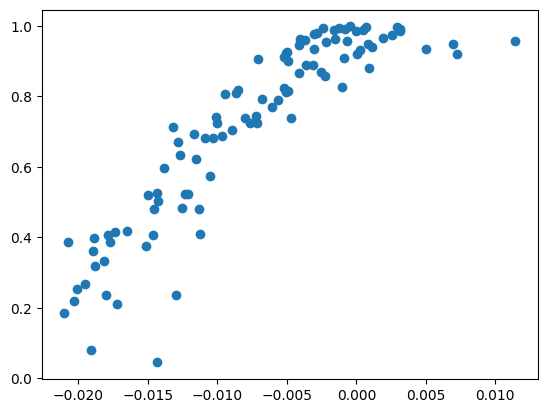

In [21]:
sdata.table.to_df()
# calculate average per column
avg = sdata.table.to_df().mean(axis=0)
# calculate variance per column
var = sdata.table.to_df().var(axis=0)
# make dataframe with columns avg and var
pd_stats = pd.DataFrame({'mean': avg, 'variance': var})
# plot mean vs variance
plt.scatter(pd_stats['mean'], pd_stats['variance'])

In [14]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"
all_mean_expression = sdata.table.to_df().mean(axis=0)
path_marker_genes = path_mg,
marker_genes = pd.read_csv(path_marker_genes[0], sep=',',index_col=0)
scores_cell_celltype = pd.DataFrame()
cell_types = marker_genes.columns.tolist()
matrix = sdata.table.to_df()
for cell_type in cell_types:
    scores_cells = []
    for i in range(matrix.shape[0]):
        score = 0 
        for gene in marker_genes[marker_genes[cell_type] == 1].index.tolist():
            score = score + (matrix[gene][i] - all_mean_expression[gene])
        scores_cells.append(score)
    scores_cell_celltype[cell_type] = scores_cells
scores_cell_celltype 


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.724390,-2.948731,-0.428053,0.390216,-1.935285,-4.028191,-2.852406,-0.405329,-0.257376
1,-4.901335,-0.451450,-1.597536,-3.249090,28.073285,-5.371889,18.302675,-0.405329,15.658499
2,-4.974463,-2.948731,-1.597536,-2.578409,-2.136977,-4.573974,21.429431,-0.405329,21.444426
3,-3.148392,-2.948731,-1.597536,-1.702138,-3.777896,-4.423556,9.946627,-0.405329,6.683257
4,-2.232764,-2.948731,-1.597536,-0.314997,-3.777896,-2.657646,-2.672196,-0.405329,-0.257376
...,...,...,...,...,...,...,...,...,...
11223,-0.170817,-2.948731,-1.597536,-0.735539,-3.777896,-2.377381,-2.867433,-0.405329,-0.257376
11224,5.014245,-2.948731,-1.597536,0.188656,0.596784,-1.736590,-2.044225,-0.405329,-0.257376
11225,0.890555,-2.948731,-1.597536,-0.779333,0.445038,-4.932637,-3.756853,-0.405329,-0.257376
11226,-7.473840,-2.948731,-1.597536,-2.796157,1.558340,29.130346,18.413673,-0.405329,-0.257376


In [15]:
# min max scale scores per cell type to make them more comparable between cell types 
scores_cell_celltype_norm = scores_cell_celltype.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
scores_cell_celltype_norm

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,0.000000,0.021096,0.085765,0.021767,0.033361,0.020318,0.0,0.000000
1,0.132747,0.055902,0.000000,0.000000,0.376261,0.010282,0.241621,0.0,0.526007
2,0.129953,0.000000,0.000000,0.015805,0.019384,0.023986,0.274330,0.0,0.717227
3,0.199726,0.000000,0.000000,0.036456,0.000000,0.026570,0.154209,0.0,0.229382
4,0.234711,0.000000,0.000000,0.069145,0.000000,0.056901,0.022204,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.313497,0.000000,0.000000,0.059235,0.000000,0.061714,0.020161,0.0,0.000000
11224,0.511616,0.000000,0.000000,0.081015,0.051679,0.072720,0.028773,0.0,0.000000
11225,0.354052,0.000000,0.000000,0.058203,0.049886,0.017826,0.010857,0.0,0.000000
11226,0.034453,0.000000,0.000000,0.010674,0.063038,0.602880,0.242782,0.0,0.000000


In [13]:
# cell is annotated with the cell type with the highest score
sc_cell_cellt = scores_cell_celltype_norm.idxmax(axis=1).to_dict()
print(scores_cell_celltype_norm.max(axis=1))
# all indices of scores_cell_celltype with max value of row < 0
unknown_cells = scores_cell_celltype_norm[scores_cell_celltype_norm.max(axis=1) < 0].index.tolist()
# change the values of keys in list
for i in unknown_cells:
    sc_cell_cellt[i] = 'unknown'

0        0.538750
1        0.526007
2        0.717227
3        0.229382
4        0.234711
           ...   
11223    0.313497
11224    0.511616
11225    0.354052
11226    0.602880
11227    0.628397
Length: 11228, dtype: float64


In [12]:
sc_cell_cellt = {str(k): v for k, v in sc_cell_cellt.items()}
sdata.table.obs["annotation_own_score_genes"] = sc_cell_cellt.values()
# cleanliness of each annotation is calculated
max_scores = scores_cell_celltype_norm.max(axis=1)
second_scores = scores_cell_celltype_norm.apply(lambda x: x.nlargest(2).values[-1], axis=1)
cleanliness = (max_scores - second_scores) / ((max_scores + second_scores) / 2)
sc_cell_cleanl = cleanliness.to_dict()
for i in unknown_cells:
    sc_cell_cleanl[i] = 0
sc_cell_cleanl = {str(k): v for k, v in sc_cell_cleanl.items()}
sdata.table.obs["cleanliness_own_score_genes"] = sc_cell_cleanl.values()